# CREDIT SCORING PROJECT

## I. Problem Definition

Usaha perbankan melputi tiga bagian yaitu melakukan penghimpunan dana dari nasabah dalam bentuk simpanan, kedua yaitu menyalurkan dana yang dihimpun kepada debitur dalam bentuk pinjaman, dan yang ketiga adalah memberikan jasa bank lainnya.
Seluruh kegiatan tersebut harus berjalan dengan optimal sehingga bank dapat memkasimlakan keuntungannya dengan tingkat risio yang telah ditentukan.
Risiko perbankan adalah risiko yang dialami sebagai bentuk dari berbagai keputusan yang dilakukan dalam berbagai bidang, seperti keputusan penyaluran kredit, penerimaan sejumlah dana, valuta asing iknaso, dan berbagai keputusan financial lainnya yang dapat menimbulkan kerugian bagi perbankan.
Salah satu risiko yang sering dijumpai adalah risiko kredit yang merupakan risiko kegagalan debitur dalam memenuhi kewajibannya sehingga dapat menggerus profit perbankan.

Penerapan manajemen risiko kredit yang baik dapat meminimalisir risiko pada level terntentu sehingga bisnis menjadi lebih optimal. Pada bisnis konsumer yaitu bisnis kartu kredit manajemen risiko dapat dilakukan dengan menggunakan metode credit scoring yaitu sebuah penilaian yang dijadikan dasar pertimbangan bagi pemberi pinjaman sebelum menyalurkan dana pinjaman ke peminjam. Pada umumnya, kriteria penilaiannya terdiri dari usia, pekerjaan pribadi dan pasangan, status perkawinan, status pendidikan, jenis tempat tinggal, jabatan dalam pekerjaan, tempat kerja, masa kerja, hingga lamanya bekerja dalam jabatan saat ini, dan lain sebagainya

Terdapat banyak metode dalam menggunakan credit scoring dan yang akan di bahas pada artikel ini adalah metode yang umum dipakai yaitu menggunakan regresi logistik.

Data yang digunkan adalah data German Credit Card ayng terdiri dari 11 variabel.

## II. Data Gathering

Data terdiri dari bebrapa variabel yang meliputi karakteristik dan demografi dari nasabah yang beserta status kreditnya.
Data terdiri drari.

*Variabel Response*
- Status credit : Acccepted. Rejected

*Variabel Predictor Categorical*
- No of Depenedents : jumlah tanggungan yang dimiliki
- Education : Graduate atau Bukan Graduate
- Self emplyed : Yes or No

*Variabel Predictor Numerical*
- Income Annum : pendapatan yang dieproleh selama satu tahun
- Loan amount : Jumlah pinjaman yang diajukan
- Loan Term : lama atau jangka waktu pinjaman
- residential assets value : jumlah asset tetap (harta tidak bergerak/perumahan)
- commercial assets value : jumlah aset produktif
- luxury assets value : jumlah asset tersier/mewah
- bank asset value : jumlah aset kas yang terdapat pada bank

In [1]:
# Load data manipulation package
import numpy as np
import pandas as pd
import itertools

# Load data visualization package
import matplotlib.pyplot as plt
import seaborn as sns

### LOAD DATA

In [2]:
# Load Credit data
data = pd.read_csv(r'D:\PELATIHAN DATA SCIENCE\credit scoring\loan_approval_dataset.csv')

In [3]:
data.head().T

,0,1,2,3,4
loan_id,1,2,3,4,5
no_of_dependents,2,0,3,3,5
education,Graduate,Not Graduate,Graduate,Graduate,Not Graduate
self_employed,No,Yes,No,No,Yes
income_annum,9600000,4100000,9100000,8200000,9800000
loan_amount,29900000,12200000,29700000,30700000,24200000
loan_term,12,8,20,8,20
cibil_score,778,417,506,467,382
residential_assets_value,2400000,2700000,7100000,18200000,12400000
commercial_assets_value,17600000,2200000,4500000,3300000,8200000


In [4]:
# drop data Loan_id
data = data.drop(columns=['loan_id','cibil_score'])

In [5]:
data.shape

(4269, 11)

Data terdiri atas 11 variables dari 4.269 credit records.
- 1 response variable, loan_status,
- and 10 potential predictors/characteristics.

In [6]:
# Replace Loan Status menjadi numeric
data['loan_status'] = data['loan_status'].replace({'Approved':1,'Rejected':0})
data

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,2400000,17600000,22700000,8000000,1
1,0,Not Graduate,Yes,4100000,12200000,8,2700000,2200000,8800000,3300000,0
2,3,Graduate,No,9100000,29700000,20,7100000,4500000,33300000,12800000,0
3,3,Graduate,No,8200000,30700000,8,18200000,3300000,23300000,7900000,0
4,5,Not Graduate,Yes,9800000,24200000,20,12400000,8200000,29400000,5000000,0
...,...,...,...,...,...,...,...,...,...,...,...
4264,5,Graduate,Yes,1000000,2300000,12,2800000,500000,3300000,800000,0
4265,0,Not Graduate,Yes,3300000,11300000,20,4200000,2900000,11000000,1900000,1
4266,2,Not Graduate,No,6500000,23900000,18,1200000,12400000,18100000,7300000,0
4267,1,Not Graduate,No,4100000,12800000,8,8200000,700000,14100000,5800000,1


Pada classification case, check cek proporsi variabel response untuk menentukan strategi splitting.

In [7]:
# Define response variable
response_variable = 'loan_status'

# Check the proportion of response variable
data[response_variable].value_counts(normalize = True)

1    0.62216
0    0.37784
Name: loan_status, dtype: float64

Proporsi dari response variable tidak terlalu balance  (in a ratio of 62:38). Maka metode yang dilakukan adalah dengan menggunakan stratified splitting dengan proporsi 80% data train dan 20% data train.

## III. Sample Splitting

Selanjutnya, split the training and testing set from each predictors (X) and response (y).

- Set stratify = y for splitting the sample with stratify, based on the proportion of response y.
- Set test_size = 0.2 for holding 20% of the sample as a testing set.
- Set random_state = 42 for reproducibility.

In [8]:
# Split response and predictors
y = data[response_variable]
X = data.drop(columns = [response_variable],
              axis = 1)

# Validate the splitting
print('y shape :', y.shape)
print('X shape :', X.shape)

y shape : (4269,)
X shape : (4269, 10)


In [9]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify = y,
                                                    test_size = 0.2,
                                                    random_state = 42)

# Validate splitting
print('X train shape :', X_train.shape)
print('y train shape :', y_train.shape)
print('X test shape  :', X_test.shape)
print('y test shape  :', y_test.shape)

X train shape : (3415, 10)
y train shape : (3415,)
X test shape  : (854, 10)
y test shape  : (854,)


In [10]:
# Check Proportion for train predictor
y_train.value_counts(normalize = True)

1    0.622255
0    0.377745
Name: loan_status, dtype: float64

In [11]:
# Check Proportion for test predictor
y_test.value_counts(normalize = True)

1    0.62178
0    0.37822
Name: loan_status, dtype: float64

## IV. Exploratory Data Analysis

To make a model that predicts well on unseen data, we must prevent leakage of test set information.
Thus, we only explore on training set.

In [12]:
# Concatenate X_train and y_train as data_train
data_train = pd.concat((X_train, y_train),
                       axis = 1)

# Validate data_train
print('Train data shape:', data_train.shape)
data_train.head()

Train data shape: (3415, 11)


,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
1877,4,Graduate,No,4800000,14300000,6,5900000,0,11100000,2600000,1
1729,3,Graduate,Yes,5800000,16700000,18,8100000,8400000,14700000,3700000,1
164,2,Graduate,Yes,8100000,22300000,18,22300000,12600000,27000000,7300000,1
2298,2,Not Graduate,Yes,4400000,13900000,6,13200000,4200000,15000000,5200000,1
2461,5,Graduate,No,6500000,24800000,8,7000000,9600000,15700000,8800000,1


In [13]:
# Check for missing values
data_train.isna().sum()

no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

Tidak terdapat data missing pada seluruh variabel, baik response maupun prediktor

#### Predictor 1 : Dependence

In [14]:
# Describe proportion of 'no_of_dependents'
data_train['no_of_dependents'].value_counts(normalize = True)

4    0.172474
3    0.171596
0    0.168375
2    0.166911
1    0.163104
5    0.157540
Name: no_of_dependents, dtype: float64

Berdasarkan proporsi di atas diketahui bahwa debitur mempunyai proporsi tanggungan yang sama antara 0 - 5 tanggungan

<Axes: xlabel='no_of_dependents', ylabel='count'>

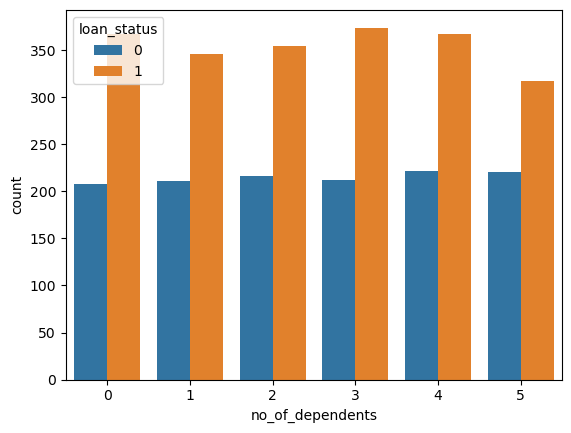

In [15]:
# Describe proportion of default by 'no_of_dependents'
sns.countplot(data = data_train,
              x = 'no_of_dependents',
              hue = response_variable)

In [16]:
# Frequency of default by 'no_of_dependents'
default_by_dependents = pd.crosstab(data_train['no_of_dependents'],
                                 data_train['loan_status'],
                                 margins = False)
default_by_dependents

loan_status,0,1
no_of_dependents,,
0,208,367
1,211,346
2,216,354
3,212,374
4,222,367
5,221,317


Berdasarkan data dan grafik di atasddapay dilihat bahwa proporsi untuk seluruh kategori bagi customer yang diapprove lebih banyak daripana yang di reject

#### Predictor 2 : Education

In [17]:
# Describe proportion of 'Education'
data_train['education'].value_counts(normalize = True)

Graduate        0.500732
Not Graduate    0.499268
Name: education, dtype: float64

<Axes: xlabel='education', ylabel='count'>

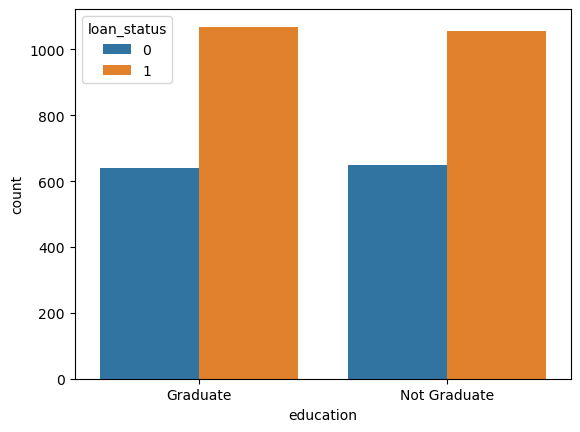

In [18]:
# Describe proportion of default by 'no_of_dependents'
sns.countplot(data = data_train,
              x = 'education',
              hue = response_variable)

In [19]:
# Frequency of default by 'no_of_dependents'
default_by_education = pd.crosstab(data_train['education'],
                                 data_train['loan_status'],
                                 margins = False)
default_by_education

loan_status,0,1
education,,
Graduate,641,1069
Not Graduate,649,1056


In [20]:
# Odds of default from those who never default
odds_never_default_ed = default_by_education.values[1][0]/default_by_education.values[0][0]

# Odds of default from those who have been in default
odds_ever_default_ed = default_by_education.values[1][1]/default_by_education.values[0][1]

print("Odds of default from debtors who:")
print(f"never default = {odds_never_default_ed:.2f}")
print(f"ever default = {odds_ever_default_ed:.2f}")

Odds of default from debtors who:
never default = 1.01
ever default = 0.99


Berdasarkan data dan grafik di atas dapat dilihat bahwa proporsi antara customer yang graduate sama dengan yang tidak graduate, serta proporsi customer yang diapprove libih banyak untuk setiap kategori.

#### Predictor 3 : Self Employed

In [21]:
# Describe proportion of 'self_employed'
data_train['self_employed'].value_counts(normalize = True)

Yes    0.504246
No     0.495754
Name: self_employed, dtype: float64

<Axes: xlabel='self_employed', ylabel='count'>

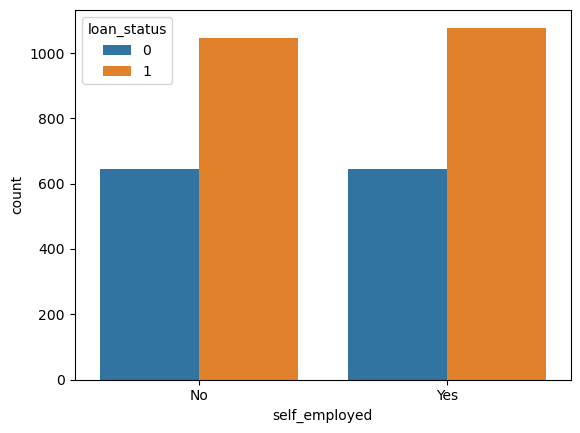

In [22]:
# Describe proportion of default by 'self_employed'
sns.countplot(data = data_train,
              x = 'self_employed',
              hue = response_variable)

In [23]:
# Frequency of default by 'self_employed'
default_by_self = pd.crosstab(data_train['self_employed'],
                                 data_train['loan_status'],
                                 margins = False)
default_by_self

loan_status,0,1
self_employed,,
No,646,1047
Yes,644,1078


In [24]:
# Odds of default from those who never default
odds_never_default_self = default_by_self.values[1][0]/default_by_self.values[0][0]

# Odds of default from those who have been in default
odds_ever_default_self = default_by_self.values[1][1]/default_by_self.values[0][1]

print("Odds of default from debtors who:")
print(f"never default = {odds_never_default_self:.2f}")
print(f"ever default = {odds_ever_default_self:.2f}")

Odds of default from debtors who:
never default = 1.00
ever default = 1.03


Berdasarkan data dan grafik di atas dapat dilihat bahwa proporsi antara customer yang self employed sama dengan yang tidak self employed, serta proporsi customer yang diapprove libih banyak untuk setiap kategori.

#### Predictor 4 : Income Annum

In [25]:
# Descriptive statistics of 'income_annum'
data_train['income_annum'].describe()

count    3.415000e+03
mean     5.058712e+06
std      2.792881e+06
min      2.000000e+05
25%      2.700000e+06
50%      5.100000e+06
75%      7.400000e+06
max      9.900000e+06
Name: income_annum, dtype: float64

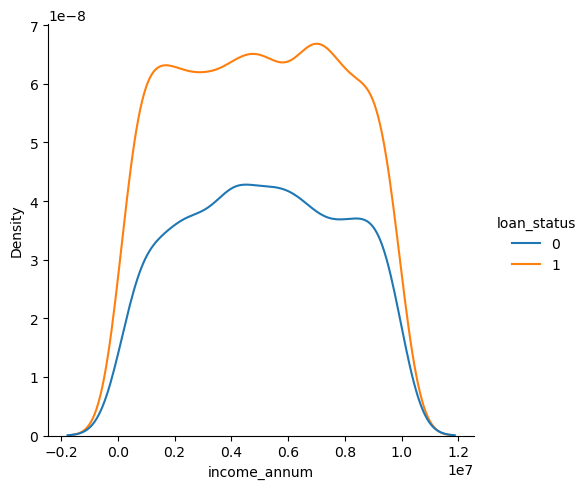

In [26]:
# Distribution plot of income_annum by response loan_status
sns.displot(data = data_train,
            x = 'income_annum',
            hue = response_variable,
            kind = 'kde')

#### Predictor 5 : Loan Amount

In [27]:
# Descriptive statistics of 'loan_amount'
data_train['loan_amount'].describe()

count    3.415000e+03
mean     1.509148e+07
std      8.926746e+06
min      3.000000e+05
25%      7.800000e+06
50%      1.460000e+07
75%      2.130000e+07
max      3.880000e+07
Name: loan_amount, dtype: float64

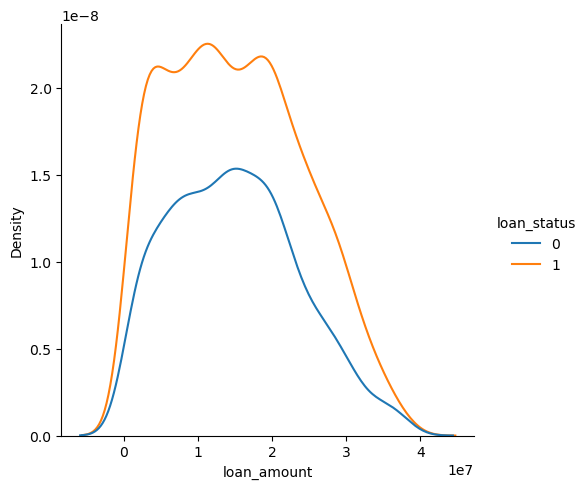

In [28]:
# Distribution plot of loan_amount by response loan_status
sns.displot(data = data_train,
            x = 'loan_amount',
            hue = response_variable,
            kind = 'kde')

#### Predictor 6 : Loan Term

In [29]:
# Describe proportion of 'loan_term'
data_train['loan_term'].value_counts(normalize = True)

6     0.113031
4     0.106296
10    0.104832
12    0.103953
18    0.100146
20    0.096925
2     0.096633
16    0.094876
14    0.092826
8     0.090483
Name: loan_term, dtype: float64

<Axes: xlabel='loan_term', ylabel='count'>

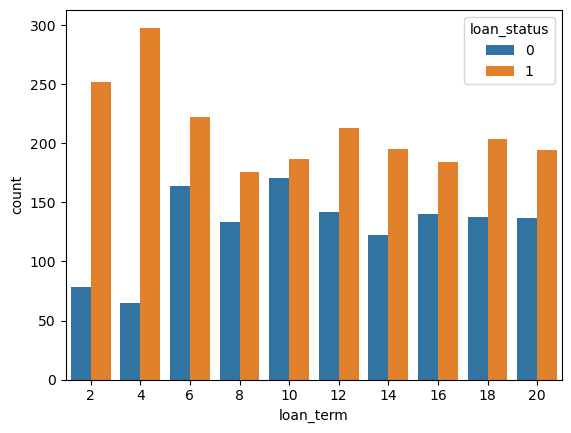

In [30]:
# Describe proportion of default by 'loan_term'
sns.countplot(data = data_train,
              x = 'loan_term',
              hue = response_variable)

In [31]:
# Frequency of default by 'laon_term'
default_by_term = pd.crosstab(data_train['loan_term'],
                                 data_train['loan_status'],
                                 margins = False)
default_by_term

loan_status,0,1
loan_term,,
2,78,252
4,65,298
6,164,222
8,133,176
10,171,187
12,142,213
14,122,195
16,140,184
18,138,204


### Bivariate Correlation Analysis

#### Define Numeric and Categorical Predictor

In [32]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3415 entries, 1877 to 272
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   no_of_dependents          3415 non-null   int64 
 1   education                 3415 non-null   object
 2   self_employed             3415 non-null   object
 3   income_annum              3415 non-null   int64 
 4   loan_amount               3415 non-null   int64 
 5   loan_term                 3415 non-null   int64 
 6   residential_assets_value  3415 non-null   int64 
 7   commercial_assets_value   3415 non-null   int64 
 8   luxury_assets_value       3415 non-null   int64 
 9   bank_asset_value          3415 non-null   int64 
 10  loan_status               3415 non-null   int64 
dtypes: int64(9), object(2)
memory usage: 449.2+ KB


In [33]:
# Define data with numerical predictors
num_columns = ['income_annum',
               'loan_amount',
               'loan_term',
               'residential_assets_value',
               'commercial_assets_value',
               'luxury_assets_value',
               'bank_asset_value',]

In [34]:
# Define data with categorical predictors
cat_columns = ['no_of_dependents',
               'education',
               'self_employed']

#### Check Multicolinearity

In [35]:
# Calculate Pearson correlation coefficient from numerical predictors
data_train_corr = data_train[num_columns].corr(method = 'pearson')

data_train_corr

,income_annum,loan_amount,loan_term,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
income_annum,1.000000,0.926537,0.009658,0.630586,0.633891,0.928504,0.849966
loan_amount,0.926537,1.000000,0.008118,0.584815,0.598336,0.859544,0.790670
loan_term,0.009658,0.008118,1.000000,0.010650,-0.008636,0.008728,0.012961
residential_assets_value,0.630586,0.584815,0.010650,1.000000,0.410946,0.584911,0.517668
commercial_assets_value,0.633891,0.598336,-0.008636,0.410946,1.000000,0.579528,0.546140
luxury_assets_value,0.928504,0.859544,0.008728,0.584911,0.579528,1.000000,0.786011
bank_asset_value,0.849966,0.790670,0.012961,0.517668,0.546140,0.786011,1.000000


<Axes: >

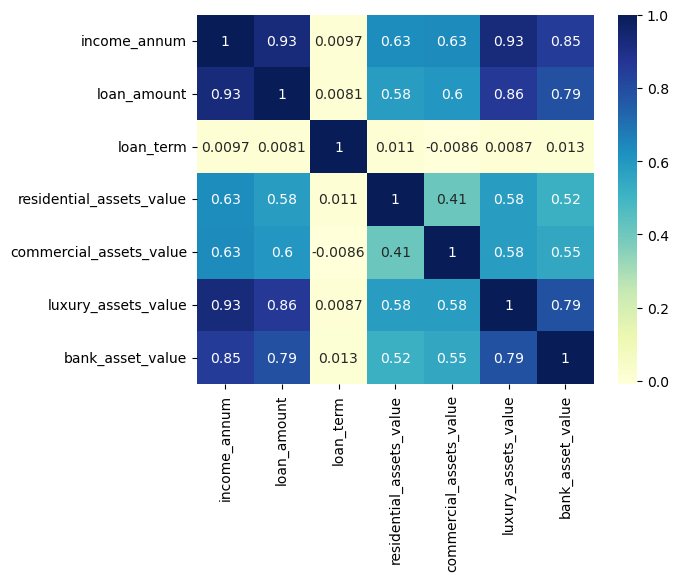

In [36]:
# Plot the heatmap correlation
sns.heatmap(data = data_train_corr,
            cmap = "YlGnBu",
            annot = True)

tedapat beebrapa korelasi yang cukup kuat antar variabel yaitu diantaranya:
- Income Annum mempunyai korelasi yang cukup kuat dengan beberapa variabel lain yaitu:
    - loan amount
    - residential assets value
    - commercial assets value
    - luxury asset value
    - bank asset value
- Loan amount mempunyai korelasi yang cukup kuat dengan beberapa variabel lain yaitu:
    - residential assets value
    - commercial assets value
    - luxury asset value
    - bank asset value
- Residential aset value mempunyai korelasi yang cukup kuat dengan beberapa variabel lain yaitu:
    - commercial assets value
    - luxury asset value
    - bank asset value
- Commercial aset value mempunyai korelasi yang cukup kuat dengan beberapa variabel lain Luxury asset dan bank assets.
- Luxury aset value mempunyai korelasi yang cukup kuat dengan bank assets.

## V. Initial Character Analysis

### Binning

Binning atau discretization atau kategorisasi diberikan untuk mempermudah dalam melakukan interpretasi variable kedepannya. Binning dilakukan pada numerical kategori denga  mengelompokkannya ke dalam beberapa grup yang ditentukan.

In [37]:
# Create a function for binning the numerical predictor
def create_binning(data, predictor_label, num_of_bins):
    """
    Function for binning numerical predictor.

    Parameters
    ----------
    data : array like
      The name of dataset.

    predictor_label : object
      The label of predictor variable.

    num_of_bins : integer
      The number of bins.


    Return
    ------
    data : array like
      The name of transformed dataset.

    """
    # Create a new column containing the binned predictor
    data[predictor_label + "_bin"] = pd.qcut(data[predictor_label],
                                             q = num_of_bins)

    return data

In [38]:
for column in num_columns:
  data_train_binned = create_binning(data = data_train,
                                     predictor_label = column,
                                     num_of_bins = 4)

#### Binning to all numerical Predictor

In [39]:
data_train_binned.head().T

,1877,1729,164,2298,2461
no_of_dependents,4,3,2,2,5
education,Graduate,Graduate,Graduate,Not Graduate,Graduate
self_employed,No,Yes,Yes,Yes,No
income_annum,4800000,5800000,8100000,4400000,6500000
loan_amount,14300000,16700000,22300000,13900000,24800000
loan_term,6,18,18,6,8
residential_assets_value,5900000,8100000,22300000,13200000,7000000
commercial_assets_value,0,8400000,12600000,4200000,9600000
luxury_assets_value,11100000,14700000,27000000,15000000,15700000
bank_asset_value,2600000,3700000,7300000,5200000,8800000


### Menghitung WoE dan IV

- WOE digunakan untukk memberikan bobot yang prorposional pada setiap kategrori di semua variabel prediktor
- IV  adalah Nilai informasi yang dapat menjelaskan variabel tersebut

In [40]:
# Define the initial empty list
crosstab_num = []

for column in num_columns:

  # Create a contingency table
  crosstab = pd.crosstab(data_train_binned[column + "_bin"],
                         data_train_binned[response_variable],
                         margins = True)

  # Append to the list
  crosstab_num.append(crosstab)

In [41]:
# Define the initial empty list
crosstab_cat = []

for column in cat_columns:

  # Create a contingency table
  crosstab = pd.crosstab(data_train_binned[column],
                         data_train_binned[response_variable],
                         margins = True)

  # Append to the list
  crosstab_cat.append(crosstab)

In [42]:
crosstab_list = crosstab_num + crosstab_cat
crosstab_list

[loan_status                 0     1   All
 income_annum_bin                         
 (199999.999, 2700000.0]   310   575   885
 (2700000.0, 5100000.0]    339   513   852
 (5100000.0, 7400000.0]    315   515   830
 (7400000.0, 9900000.0]    326   522   848
 All                      1290  2125  3415,
 loan_status                  0     1   All
 loan_amount_bin                           
 (299999.999, 7800000.0]    318   547   865
 (7800000.0, 14600000.0]    334   520   854
 (14600000.0, 21300000.0]   347   498   845
 (21300000.0, 38800000.0]   291   560   851
 All                       1290  2125  3415,
 loan_status       0     1   All
 loan_term_bin                  
 (1.999, 6.0]    307   772  1079
 (6.0, 10.0]     304   363   667
 (10.0, 16.0]    404   592   996
 (16.0, 20.0]    275   398   673
 All            1290  2125  3415,
 loan_status                      0     1   All
 residential_assets_value_bin                  
 (-100000.001, 2200000.0]       322   554   876
 (2200000.0, 

In [43]:
# Define the initial list for WOE
WOE_list = []

# Define the initial list for IV
IV_list = []

# Create the initial table for IV
IV_table = pd.DataFrame({'Characteristic': [],
                         'Information Value' : []})

# Perform the algorithm for all crosstab
for crosstab in crosstab_list:

  # Calculate % Good
  crosstab['p_good'] = crosstab[0]/crosstab[0]['All']

  # Calculate % Bad
  crosstab['p_bad'] = crosstab[1]/crosstab[1]['All']

  # Calculate the WOE
  crosstab['WOE'] = np.log(crosstab['p_good']/crosstab['p_bad'])

  # Calculate the contribution value for IV
  crosstab['contribution'] = (crosstab['p_good']-crosstab['p_bad'])*crosstab['WOE']

  # Calculate the IV
  IV = crosstab['contribution'][:-1].sum()

  add_IV = {'Characteristic': crosstab.index.name,
            'Information Value': IV}

  WOE_list.append(crosstab)
  IV_list.append(add_IV)

In [44]:
# Create initial table to summarize the WOE values
WOE_table = pd.DataFrame({'Characteristic': [],
                          'Attribute': [],
                          'WOE': []})

for i in range(len(crosstab_list)):

  # Define crosstab and reset index
  crosstab = crosstab_list[i].reset_index()

  # Save the characteristic name
  char_name = crosstab.columns[0]

  # Only use two columns (Attribute name and its WOE value)
  # Drop the last row (average/total WOE)
  crosstab = crosstab.iloc[:-1, [0,-2]]
  crosstab.columns = ['Attribute', 'WOE']

  # Add the characteristic name in a column
  crosstab['Characteristic'] = char_name

  WOE_table = pd.concat((WOE_table, crosstab),
                        axis = 0)

  # Reorder the column
  WOE_table.columns = ['Characteristic',
                       'Attribute',
                       'WOE']

WOE_table

,Characteristic,Attribute,WOE
0,income_annum_bin,"(199999.999, 2700000.0]",-0.118668
1,income_annum_bin,"(2700000.0, 5100000.0]",0.084854
2,income_annum_bin,"(5100000.0, 7400000.0]",0.007535
3,income_annum_bin,"(7400000.0, 9900000.0]",0.028359
0,loan_amount_bin,"(299999.999, 7800000.0]",-0.043268
1,loan_amount_bin,"(7800000.0, 14600000.0]",0.056442
2,loan_amount_bin,"(14600000.0, 21300000.0]",0.137854
3,loan_amount_bin,"(21300000.0, 38800000.0]",-0.155484
0,loan_term_bin,"(1.999, 6.0]",-0.423007
1,loan_term_bin,"(6.0, 10.0]",0.321754


In [45]:
# Put all IV in the table
IV_table = pd.DataFrame(IV_list)
IV_table

,Characteristic,Information Value
0,income_annum_bin,0.005621
1,loan_amount_bin,0.011949
2,loan_term_bin,0.081267
3,residential_assets_value_bin,0.002138
4,commercial_assets_value_bin,0.003740
5,luxury_assets_value_bin,0.007832
6,bank_asset_value_bin,0.006690
7,no_of_dependents,0.004661
8,education,0.000152
9,self_employed,0.000260


The rule of thumb regarding IV:

- Less than 0.02 : generally unpredictive
- 0.02 to 0.1 : weak
- 0.1 to 0.3 : medium
- 0.3+ : strong

In [46]:
# Define the predictive power of each characteristic
strength = []

# Assign the rule of thumb regarding IV
for iv in IV_table['Information Value']:
  if iv < 0.02:
    strength.append('Unpredictive')
  elif iv >= 0.02 and iv < 0.1:
    strength.append('Weak')
  elif iv >= 0.1 and iv < 0.3:
    strength.append('Medium')
  elif iv >= 0.3 and iv < 0.5:
    strength.append('Strong')
  else:
    strength.append('Very strong')

# Assign the strength to each characteristic
IV_table = IV_table.assign(Strength = strength)

# Sort the table by the IV values
IV_table.sort_values(by='Information Value')

,Characteristic,Information Value,Strength
8,education,0.000152,Unpredictive
9,self_employed,0.000260,Unpredictive
3,residential_assets_value_bin,0.002138,Unpredictive
4,commercial_assets_value_bin,0.003740,Unpredictive
7,no_of_dependents,0.004661,Unpredictive
0,income_annum_bin,0.005621,Unpredictive
6,bank_asset_value_bin,0.006690,Unpredictive
5,luxury_assets_value_bin,0.007832,Unpredictive
1,loan_amount_bin,0.011949,Unpredictive
2,loan_term_bin,0.081267,Weak


Berdasarkan infermasi IV hanya loan term yang mempunyai nilai lebih memberikan value sisanya melum mencukupi unutk memberikan informasi.

## VI. Design Scorecard

### 1. Logical Trends and Business Consideration

In grouped scorecards, the attribute strengths must also be in a logical order, and make operational sense.

In [47]:
char_list = IV_table['Characteristic'].tolist()
char_list

['income_annum_bin',
 'loan_amount_bin',
 'loan_term_bin',
 'residential_assets_value_bin',
 'commercial_assets_value_bin',
 'luxury_assets_value_bin',
 'bank_asset_value_bin',
 'no_of_dependents',
 'education',
 'self_employed']

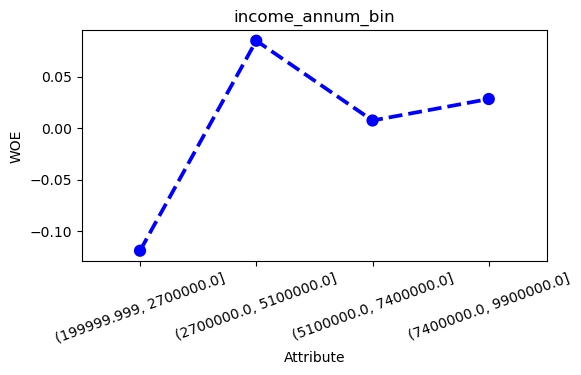

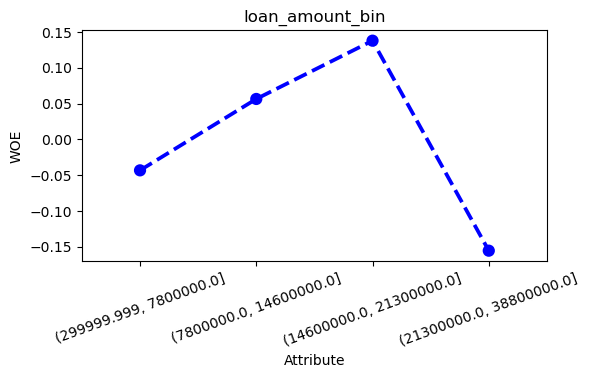

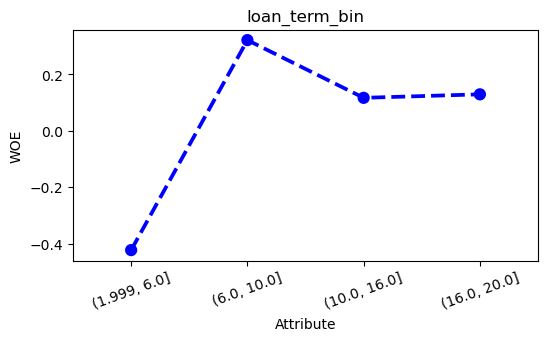

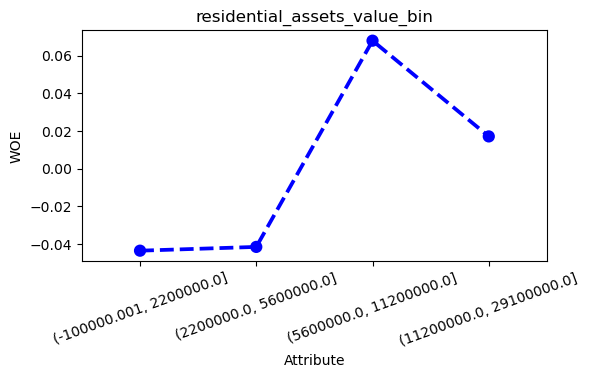

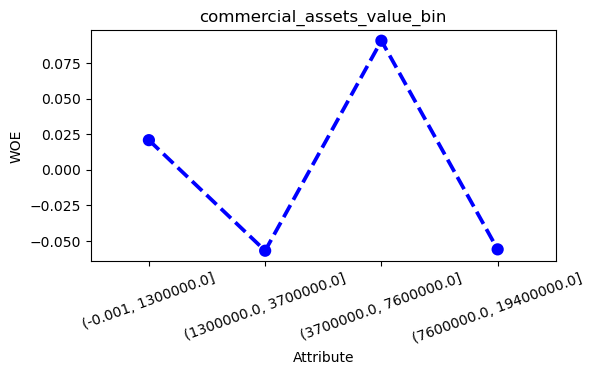

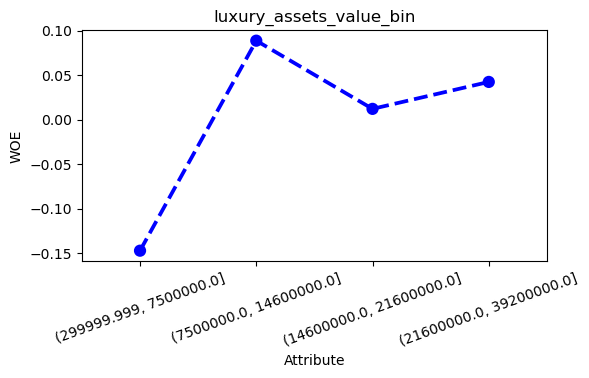

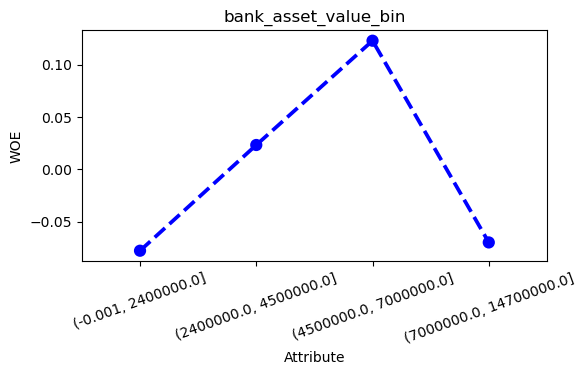

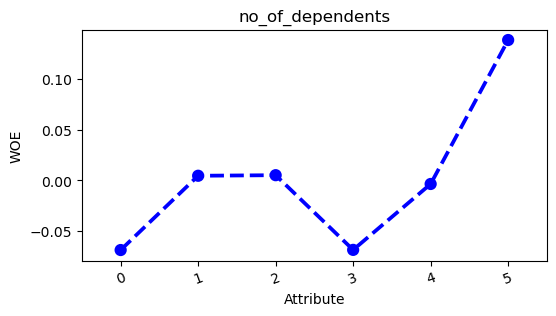

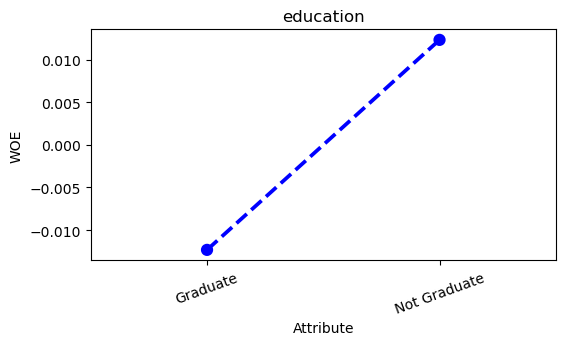

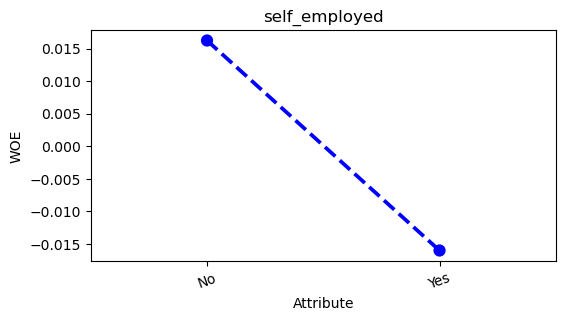

In [48]:
for char in char_list:

  crosstab = WOE_table[WOE_table['Characteristic'] == char]

  # Define the plot size and title
  plt.figure(figsize = (6,3))
  plt.title(char)

  # Plot the WOE
  sns.pointplot(x = crosstab['Attribute'],
                y = 'WOE',
                data = crosstab,
                markers = 'o',
                linestyles = '--',
                color = 'blue')

  # Rotate the label of x-axis
  plt.xticks(rotation = 20)

### 2. Perform Independet test

- Assume that the WOE for each attribute in all characteristics supports the logical trend and operational/business sense.
- Then, we can check the strength of each characteristic as a predictor of credit performance by its Information Value (IV).

In [49]:
# Define the predictive power of each characteristic
strength = []

for iv in IV_table['Information Value']:
  if iv < 0.02:
    strength.append('Unpredictive')
  elif iv >= 0.02 and iv < 0.1:
    strength.append('Weak')
  elif iv >= 0.1 and iv < 0.3:
    strength.append('Medium')
    
  else:
    strength.append('Strong')

IV_table = IV_table.assign(Strength = strength)
IV_table

,Characteristic,Information Value,Strength
0,income_annum_bin,0.005621,Unpredictive
1,loan_amount_bin,0.011949,Unpredictive
2,loan_term_bin,0.081267,Weak
3,residential_assets_value_bin,0.002138,Unpredictive
4,commercial_assets_value_bin,0.003740,Unpredictive
5,luxury_assets_value_bin,0.007832,Unpredictive
6,bank_asset_value_bin,0.006690,Unpredictive
7,no_of_dependents,0.004661,Unpredictive
8,education,0.000152,Unpredictive
9,self_employed,0.000260,Unpredictive


In [50]:
# Import the libraries
import scipy.stats as stats
from scipy.stats import chi2_contingency

# Create a function of independence test
def independence_test(data, characteristic_label, alpha=0.05):
    """
    Function to perform the independence test.

    Parameters
    ----------
    data : array like
      The name of dataset.

    characteristic_label : object
      The label of characteristic variable.

    alpha : float in range[0,1], default = 0.05
      Probability of Type I Error (reject H0 when H0 is true).

    Return
    ------
    res : dataframe
      The summary result of the independence test.

    """
    # Build the contingency table
    crosstab = pd.crosstab(data[characteristic_label],
                           data[response_variable],
                           margins = False)

    # Test whether churn is independent of the predictor
    stats.chi2_contingency(crosstab)

    # Result of independence test
    result = stats.chi2_contingency(crosstab)

    # Extract the test result
    stat = result[0]
    pval = result[1]

    # Print the conclusion
    if pval < alpha:
        conclusion = 'Not Independent'
    else:
        conclusion = 'Independent'

    # Tabulate the results
    res = pd.DataFrame({'Characteristic': characteristic_label,
                        'Chi-stat': round(stat,2),
                        'P-value': pval,
                        'Conclusion': conclusion},
                       index = [0])

    return res

In [51]:
# Define initial table to summarize the test result
ind_table = pd.DataFrame({'Characteristic': [],
                        'Chi-stat': [],
                        'P-value': [],
                        'Conclusion': []})

# Perform independence test for all characteristics
for characteristic in char_list:

  # Perform the independence test
  test_result = independence_test(data = data_train_binned,
                                  characteristic_label = characteristic,
                                  alpha = 0.05)

  # # Append test result to the table
  ind_table = pd.concat((ind_table, test_result),
                        axis = 0,
                        ignore_index = True)

In [52]:
# Check the results
ind_table

,Characteristic,Chi-stat,P-value,Conclusion
0,income_annum_bin,4.48,2.138383e-01,Independent
1,loan_amount_bin,9.56,2.274506e-02,Not Independent
2,loan_term_bin,63.19,1.222404e-13,Not Independent
3,residential_assets_value_bin,1.72,6.324813e-01,Independent
4,commercial_assets_value_bin,3.01,3.900086e-01,Independent
5,luxury_assets_value_bin,6.22,1.012851e-01,Independent
6,bank_asset_value_bin,5.39,1.452223e-01,Independent
7,no_of_dependents,3.77,5.832113e-01,Independent
8,education,0.10,7.537234e-01,Independent
9,self_employed,0.18,6.730536e-01,Independent


Hanya loan amount dan loan term yang memiliki hasil not independent sisanga independent.

### 3. Pre_processing Training Set

In [53]:
# Function to generate the WOE mapping dictionary
def get_woe_map_dict(WOE_table):

    # Initialize the dictionary
    WOE_map_dict = {}
    WOE_map_dict['Missing'] = {}

    unique_char = set(WOE_table['Characteristic'])
    for char in unique_char:
        # Get the Attribute & WOE info for each characteristics
        current_data = (WOE_table
                            [WOE_table['Characteristic']==char]     # Filter based on characteristic
                            [['Attribute', 'WOE']])                 # Then select the attribute & WOE

        # Get the mapping
        WOE_map_dict[char] = {}
        for idx in current_data.index:
            attribute = current_data.loc[idx, 'Attribute']
            woe = current_data.loc[idx, 'WOE']

            if attribute == 'Missing':
                WOE_map_dict['Missing'][char] = woe
            else:
                WOE_map_dict[char][attribute] = woe
                WOE_map_dict['Missing'][char] = np.nan

    # Validate data
    print('Number of key : ', len(WOE_map_dict.keys()))

    return WOE_map_dict

In [54]:
# Generate the WOE map dictionary
WOE_map_dict = get_woe_map_dict(WOE_table = WOE_table)
WOE_map_dict

Number of key :  11


{'Missing': {'luxury_assets_value_bin': nan,
  'commercial_assets_value_bin': nan,
  'loan_amount_bin': nan,
  'bank_asset_value_bin': nan,
  'loan_term_bin': nan,
  'residential_assets_value_bin': nan,
  'self_employed': nan,
  'no_of_dependents': nan,
  'education': nan,
  'income_annum_bin': nan},
 'luxury_assets_value_bin': {Interval(299999.999, 7500000.0, closed='right'): -0.14717468779707116,
  Interval(7500000.0, 14600000.0, closed='right'): 0.0888171566603103,
  Interval(14600000.0, 21600000.0, closed='right'): 0.01218944522616567,
  Interval(21600000.0, 39200000.0, closed='right'): 0.04247219670995842},
 'commercial_assets_value_bin': {Interval(-0.001, 1300000.0, closed='right'): 0.020852120419667337,
  Interval(1300000.0, 3700000.0, closed='right'): -0.05681647504366085,
  Interval(3700000.0, 7600000.0, closed='right'): 0.0907015107639778,
  Interval(7600000.0, 19400000.0, closed='right'): -0.05586725807632856},
 'loan_amount_bin': {Interval(299999.999, 7800000.0, closed='rig

In [55]:
# Function to replace the raw data in the train set with WOE values
def transform_woe(raw_data, WOE_dict, num_cols):

    woe_data = raw_data.copy()

    # Map the raw data
    for col in woe_data.columns:
        if col in num_cols:
            map_col = col + '_bin'
        else:
            map_col = col

        woe_data[col] = woe_data[col].map(WOE_map_dict[map_col])

    # Map the raw data if there is a missing value or out of range value
    for col in woe_data.columns:
        if col in num_cols:
            map_col = col + '_bin'
        else:
            map_col = col

        woe_data[col] = woe_data[col].fillna(value=WOE_map_dict['Missing'][map_col])

    return woe_data

In [56]:
# Transform the X_train
woe_train = transform_woe(raw_data = X_train.iloc[:, 0:],
                          WOE_dict = WOE_map_dict,
                          num_cols = num_columns)

woe_train

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
1877,-0.003555,-0.012320,0.016245,0.084854,0.056442,-0.423007,0.068047,0.020852,0.088817,0.023284
1729,-0.068540,-0.012320,-0.016034,0.007535,0.137854,0.129449,0.068047,-0.055867,0.012189,0.023284
164,0.005111,-0.012320,-0.016034,0.028359,-0.155484,0.129449,0.017200,-0.055867,0.042472,-0.069720
2298,0.005111,0.012319,-0.016034,0.084854,0.056442,-0.423007,0.017200,0.090702,0.012189,0.122821
2461,0.138391,-0.012320,0.016245,0.007535,-0.155484,0.321754,0.068047,-0.055867,0.012189,-0.069720
...,...,...,...,...,...,...,...,...,...,...
1386,-0.003555,-0.012320,-0.016034,0.007535,0.137854,0.117038,0.068047,-0.055867,0.042472,0.023284
2913,-0.003555,0.012319,-0.016034,-0.118668,-0.043268,0.129449,-0.043484,0.020852,-0.147175,-0.077627
4072,-0.068540,-0.012320,-0.016034,0.007535,0.137854,-0.423007,0.068047,0.090702,0.088817,0.023284
361,-0.068694,-0.012320,0.016245,0.084854,0.056442,-0.423007,-0.041473,0.020852,0.088817,0.122821


### 3. Pre_processing Testing Set

In [57]:
# Transform the X_test
woe_test = transform_woe(raw_data = X_test.iloc[:, 0:],
                         WOE_dict = WOE_map_dict,
                         num_cols = num_columns)

woe_test

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
2856,-0.068540,0.012319,-0.016034,0.028359,-0.155484,-0.423007,-0.043484,-0.056816,0.012189,0.122821
3176,-0.003555,0.012319,-0.016034,0.084854,0.056442,0.129449,-0.041473,0.090702,0.088817,0.023284
477,0.004549,-0.012320,0.016245,0.028359,-0.155484,0.117038,0.017200,-0.056816,0.042472,0.122821
4023,-0.068694,0.012319,0.016245,0.084854,0.056442,-0.423007,0.068047,0.020852,0.088817,0.023284
134,-0.068540,0.012319,0.016245,-0.118668,-0.043268,0.117038,-0.043484,0.020852,-0.147175,-0.077627
...,...,...,...,...,...,...,...,...,...,...
629,-0.068694,-0.012320,0.016245,0.028359,-0.155484,-0.423007,0.068047,0.020852,0.012189,-0.069720
2916,-0.068540,0.012319,-0.016034,-0.118668,-0.043268,-0.423007,-0.043484,0.020852,-0.147175,-0.077627
3688,-0.003555,-0.012320,-0.016034,0.084854,0.056442,-0.423007,0.068047,0.020852,0.088817,0.122821
95,0.138391,-0.012320,0.016245,-0.118668,-0.043268,-0.423007,-0.043484,0.020852,-0.147175,-0.077627


### 4. Performing Initial Logistics Regression

Lakukan pemodelan regresi logistik dengan menggunakan data training

In [58]:
# Rename the raw X_train for the future
raw_train = X_train
raw_train

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
1877,4,Graduate,No,4800000,14300000,6,5900000,0,11100000,2600000
1729,3,Graduate,Yes,5800000,16700000,18,8100000,8400000,14700000,3700000
164,2,Graduate,Yes,8100000,22300000,18,22300000,12600000,27000000,7300000
2298,2,Not Graduate,Yes,4400000,13900000,6,13200000,4200000,15000000,5200000
2461,5,Graduate,No,6500000,24800000,8,7000000,9600000,15700000,8800000
...,...,...,...,...,...,...,...,...,...,...
1386,4,Graduate,Yes,6600000,16000000,16,6500000,12600000,24700000,4500000
2913,4,Not Graduate,Yes,500000,1300000,18,1400000,0,1600000,300000
4072,3,Graduate,Yes,5300000,17900000,2,10200000,6400000,11600000,3600000
361,0,Graduate,No,4400000,14100000,2,3300000,1300000,8800000,6200000


In [59]:
# Define X_train
X_train = woe_train.to_numpy()
X_train

array([[-0.00355488, -0.01231987,  0.01624488, ...,  0.02085212,
         0.08881716,  0.02328368],
       [-0.06853994, -0.01231987, -0.01603444, ..., -0.05586726,
         0.01218945,  0.02328368],
       [ 0.00511108, -0.01231987, -0.01603444, ..., -0.05586726,
         0.0424722 , -0.06971988],
       ...,
       [-0.06853994, -0.01231987, -0.01603444, ...,  0.09070151,
         0.08881716,  0.02328368],
       [-0.06869418, -0.01231987,  0.01624488, ...,  0.02085212,
         0.08881716,  0.12282106],
       [-0.06853994, -0.01231987,  0.01624488, ..., -0.05586726,
         0.0424722 , -0.06971988]])

In [60]:
# Check y_train
y_train = y_train.to_numpy()
y_train

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

### 5. Performing Forward Selection

Untuk memilih model terbaik lakukan pemilihan model dengan metode forward selection

In [61]:
# Import library
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression

In [62]:
# Define Factor and Offset
factor = 20/np.log(2)
offset = 200-(factor*np.log(50))

factor, offset

(28.85390081777927, 87.1228762045055)

In [63]:
def forward(X, y, predictors, scoring='roc_auc', cv=5):
    """
    Function to perform forward selection procedure.

    Parameters
    ----------
    X : {array-like} of shape (n_sample, n_predictors)
      All predictors set.

    y : {array-like} of shape (n_sample, )
      The dependent or response variable.

    predictors : {array-like} of shape (n_sample, )
      Index of predictors

    scoring : a single {str}, default='roc_auc'
      The scoring parameter based on scikit-learn cross_validate documentation.

    cv : int, default=5
      Number of folds for k-Fold CV.

    Returns
    -------
    models : {array-like} of shape (n_combinations, k)
      Summary of predictors and its AIC score for each possible combination.

    best_model : {array-like} of shape (2, )
      Best model of models with the smallest AIC score.
    """

    # Initialize list of results
    results = []

    # Define sample size and  number of all predictors
    n_samples, n_predictors = X.shape

    # Define list of all predictors
    col_list = np.arange(n_predictors)

    # Define remaining predictors for each k
    remaining_predictors = [p for p in col_list if p not in predictors]

    # Initialize list of predictors and its CV Score
    pred_list = []
    score_list = []

    # Cross validate each possible combination of remaining predictors
    for p in remaining_predictors:
        combi = predictors + [p]

        # Extract predictors combination
        X_ = X[:, combi]
        y_ = y

        # Define the estimator
        model = LogisticRegression(penalty = None,
                                   class_weight = 'balanced')

        # Cross validate the recall scores of the model
        cv_results = cross_validate(estimator = model,
                                    X = X_,
                                    y = y_,
                                    scoring = scoring,
                                    cv = cv)

        # Calculate the average CV/recall score
        score_ = np.mean(cv_results['test_score'])

        # Append predictors combination and its CV Score to the list
        pred_list.append(list(combi))
        score_list.append(score_)

    # Tabulate the results
    models = pd.DataFrame({"Predictors": pred_list,
                           "Recall": score_list})

    # Choose the best model
    best_model = models.loc[models['Recall'].argmax()]

    return models, best_model

In [64]:
# Define predictor for the null model
predictor = []

# The predictor in the null model is zero values for all predictors
X_null = np.zeros((X_train.shape[0], 1))

# Define the estimator
model = LogisticRegression(penalty = None,
                           class_weight = 'balanced')

# Cross validate
cv_results = cross_validate(estimator = model,
                            X = X_null,
                            y = y_train,
                            cv = 10,
                            scoring = 'recall')

# Calculate the average CV/recall score
score_ = np.mean(cv_results['test_score'])

# Create table for the best model of each k predictors
# Append the results of null model
forward_models = pd.DataFrame({"Predictors": [predictor],
                               "Recall": [score_]})

In [65]:
# Display the table
forward_models

,Predictors,Recall
0,[],0.0


In [66]:
n_predictors = X_train.shape[1]
n_predictors

10

In [67]:
X_train.shape

(3415, 10)

In [68]:
# Define list of predictors
predictors = []
n_predictors = X_train.shape[1]

# Perform forward selection procedure for k=1,...,11 predictors
for k in range(n_predictors):
    _, best_model = forward(X = X_train,
                            y = y_train,
                            predictors = predictors,
                            scoring = 'recall',
                            cv = 5)

    # Tabulate the best model of each k predictors
    forward_models.loc[k+1] = best_model
    predictors = best_model['Predictors']

In [69]:
# Display the results
forward_models

,Predictors,Recall
0,[],0.000000
1,[0],0.521412
2,"[0, 1]",0.585882
3,"[0, 1, 6]",0.586353
4,"[0, 1, 6, 7]",0.581176
5,"[0, 1, 6, 7, 2]",0.563765
6,"[0, 1, 6, 7, 2, 9]",0.554353
7,"[0, 1, 6, 7, 2, 9, 3]",0.540706
8,"[0, 1, 6, 7, 2, 9, 3, 8]",0.528941
9,"[0, 1, 6, 7, 2, 9, 3, 8, 4]",0.520000


In [70]:
# Find the best Recall score
best_idx = forward_models['Recall'].argmax()
best_recall = forward_models['Recall'].loc[best_idx]
best_predictors = forward_models['Predictors'].loc[best_idx]

# Print the summary
print('Best index            :', best_idx)
print('Best Recall           :', best_recall)
print('Best predictors (idx) :', best_predictors)
print('Best predictors       :')
print(raw_train.columns[best_predictors].tolist())

Best index            : 3
Best Recall           : 0.5863529411764705
Best predictors (idx) : [0, 1, 6]
Best predictors       :
['no_of_dependents', 'education', 'residential_assets_value']


Diperoleh best predictor yang menghasilkan nilai recall terbaik yaitu:
- no_of_dependents
- education
- residential_assets_value

### 6. Performing Best Predictors Logistics Regression

In [71]:
# Define X with best predictors
X_train_best = X_train[:, best_predictors]

# Fit best model
best_model = LogisticRegression(penalty = None,
                                class_weight = 'balanced')
best_model.fit(X_train_best, y_train)

LogisticRegression(class_weight='balanced', penalty=None)

In [72]:
best_model_intercept = pd.DataFrame({'Estimate': best_model.intercept_},
                                    index = ["Intercept"])
best_model_intercept

,Estimate
Intercept,-9.693952e-07


In [73]:
best_model_params = raw_train.columns[best_predictors].tolist()
best_model_coefs = pd.DataFrame({'Estimate':  np.reshape(best_model.coef_, best_idx)},
                                index = best_model_params)

best_model_summary = pd.concat((best_model_intercept, best_model_coefs),
                               axis = 0)

best_model_summary

,Estimate
Intercept,-9.693952e-07
no_of_dependents,-9.943471e-01
education,-9.815531e-01
residential_assets_value,-9.897752e-01


## VII. Model Evaluation

### 1. Predict On Train Data

In [74]:
# Predict class labels for sample in X_train.
y_train_pred = best_model.predict(X_train_best)
y_train_pred

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [75]:
# Import metrics package
from sklearn.metrics import recall_score

In [76]:
# Calculate the recall score on the train set
recall_train = recall_score(y_true = y_train,
                            y_pred = y_train_pred)

recall_train

0.5665882352941176

In [77]:
# Predict the probability estimates
y_train_pred_proba = best_model.predict_proba(X_train_best)[:,[1]]
y_train_pred_proba

array([[0.4870716 ],
       [0.5032231 ],
       [0.49749624],
       ...,
       [0.5032231 ],
       [0.53032443],
       [0.53028623]])

<Axes: ylabel='Count'>

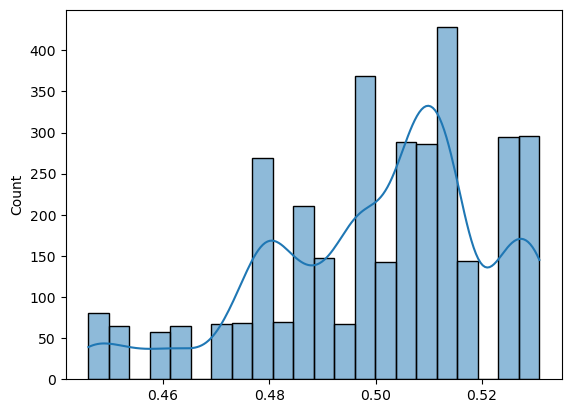

In [78]:
# Distribution plot of predicted probability
sns.histplot(x = np.reshape(y_train_pred_proba,
                            y_train.shape[0]),
             kde = True)

### 2. Predict On Test Data

In [79]:
# Rename the raw X_test for the future
raw_test = X_test

In [80]:
# Define X_test
X_test = woe_test.to_numpy()

In [81]:
# Define X_test with best predictors
X_test_best = X_test[:, best_predictors]
X_test_best = pd.DataFrame(X_test_best)
X_test_best = X_test_best.fillna(0)

In [82]:
# Check y_test
y_test = y_test.to_numpy()

In [83]:
# Predict class labels for sample in X_test.
y_test_pred = best_model.predict(X_test_best)

In [84]:
# Calculate the recall score on the test set
recall_test = recall_score(y_true = y_test,
                           y_pred = y_test_pred)

recall_test

0.5574387947269304

In [85]:
# Predict the probability estimates
y_test_pred_proba = best_model.predict_proba(X_test_best)[:,[1]]

<Axes: ylabel='Count'>

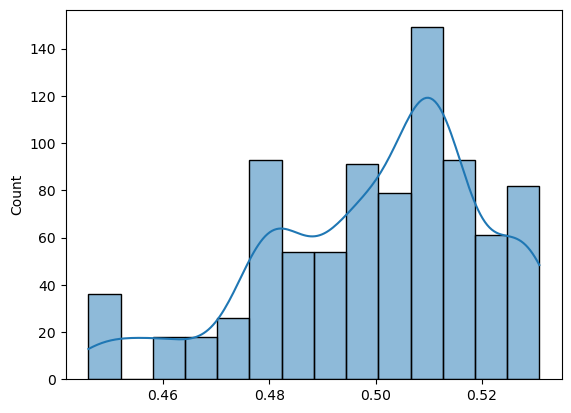

In [86]:
# Distribution plot of predicted probability
sns.histplot(x = np.reshape(y_test_pred_proba,
                            y_test.shape[0]),
             kde = True)

Summary:

- Dari model selection, kita mendapat model terbaik dengan 3 variabel prediktor yaitu (no_of_independents and education dan residential_assets_value).
    - Sensivity/recal scoree dari best model adalah  0,56 untuk train data dan 0,55 untuk test data:
    - Tartinya model dapat memprediksi sekitar 51% rejected applicant..
- Kita masih terdapat 44% dalam miskalsifikasi yang artinya cukup besar.
    - Best model dapat dipertanyakan mengingat variabel yang diambuil hanya 3 dari 10
    - kita dapat melakukan prediksi kepada 10 model dan membanding apa terdapat perbedaan recall yang soignifikan.

### 3. Model Adjustment

- Scorecard dengan sedikit karakteristik secara umum tidak dapat diterapkan dalam jangka waktu yang panjang:
    - Mereka rentan terhadap perubahan kecil pada profil pelamar.
    - Perdiktor yang baik adalah prediktor yang bukan hanya melihat berdasarkan 3 dari 10 variabel yang tersedia.
- Kita akan memasukkan seluruh karakteristik dalam final model.
    - Berdasarkan independent test, terdapat 8 variabel yang tidak independent. Namun salah satu asumsi regresi logistik menyatakan bahwa independesi variabel tidak mutlak disyaratkan
    - Secara umum, best practice untuk final scorecards terdiri dari 8 hingga 15 variabel.

In [87]:
best_predictors = forward_models['Predictors'].loc[len(predictors)]

In [88]:
# Define X with best predictors
X_train_best = X_train[:, best_predictors]

# Fit best model
best_model = LogisticRegression(penalty = None,
                                class_weight = 'balanced')
best_model.fit(X_train_best, y_train)

LogisticRegression(class_weight='balanced', penalty=None)

In [89]:
best_model_intercept = pd.DataFrame({'Characteristic': 'Intercept',
                                     'Estimate': best_model.intercept_})
best_model_intercept

,Characteristic,Estimate
0,Intercept,-0.000105


In [90]:
best_model_params = raw_train.columns[best_predictors].tolist()
best_model_coefs = pd.DataFrame({'Characteristic':  best_model_params,
                                 'Estimate':        np.reshape(best_model.coef_,
                                                               len(best_predictors))})

best_model_summary = pd.concat((best_model_intercept, best_model_coefs),
                               axis = 0,
                               ignore_index = True)

best_model_summary

,Characteristic,Estimate
0,Intercept,-0.000105
1,no_of_dependents,-1.216861
2,education,-1.169949
3,residential_assets_value,-0.335929
4,commercial_assets_value,-0.829924
5,self_employed,-1.488469
6,bank_asset_value,-0.495299
7,income_annum,0.454696
8,luxury_assets_value,-0.844206
9,loan_amount,-0.900625


##### Predict Again on Train data

In [91]:
# Predict class labels for sample in X_train.
y_train_pred = best_model.predict(X_train_best)
y_train_pred

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [92]:
# Calculate the recall score on the train set
recall_train = recall_score(y_true = y_train,
                            y_pred = y_train_pred)

recall_train

0.5232941176470588

In [93]:
# Predict the probability estimates
y_train_pred_proba = best_model.predict_proba(X_train_best)[:,[1]]
y_train_pred_proba

array([[0.57301007],
       [0.46712463],
       [0.52246549],
       ...,
       [0.56336229],
       [0.58925798],
       [0.42253379]])

<Axes: ylabel='Count'>

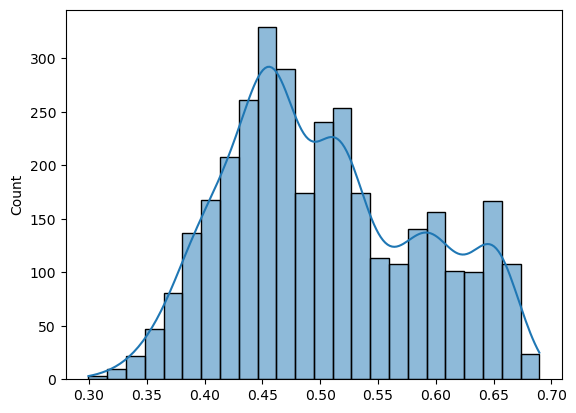

In [94]:
# Distribution plot of predicted probability
sns.histplot(x = np.reshape(y_train_pred_proba,
                            y_train.shape[0]),
             kde = True)

In [95]:
# Using method sklearn.metrics.roc_curve
from sklearn import metrics

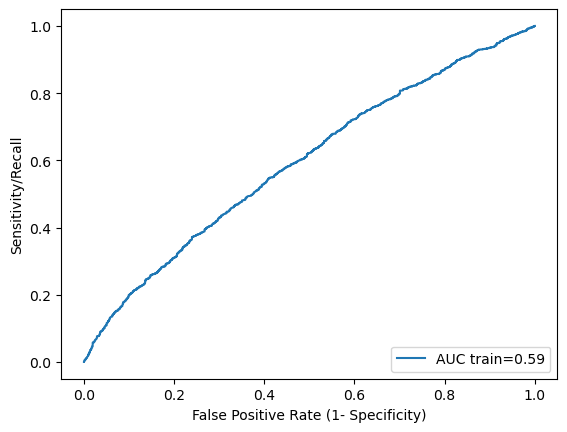

In [96]:
# Predict probability of default on X_train
y_train_pred_proba = best_model.predict_proba(X_train_best)

# Calculate sensitivity (TPR) and 1-specificity (FPR) from each possible threshold
fpr, tpr, threshold = metrics.roc_curve(y_true = y_train,
                                        y_score = y_train_pred_proba[:,1])

# Calculate AUC score using method sklearn.metrics.roc_auc_score
auc_train = metrics.roc_auc_score(y_true = y_train,
                                  y_score = y_train_pred_proba[:,1])
auc_train = round(auc_train, 2)

# Plot ROC and its AUC
plt.plot(fpr,
         tpr,
         label = "AUC train="+str(auc_train))

plt.ylabel("Sensitivity/Recall")
plt.xlabel("False Positive Rate (1- Specificity)")
plt.legend(loc = 4)
plt.show()

In [97]:
!pip install scikit-plot
import scikitplot as skplt

Defaulting to user installation because normal site-packages is not writeable


<Axes: title={'center': 'KS Statistic Plot'}, xlabel='Threshold', ylabel='Percentage below threshold'>

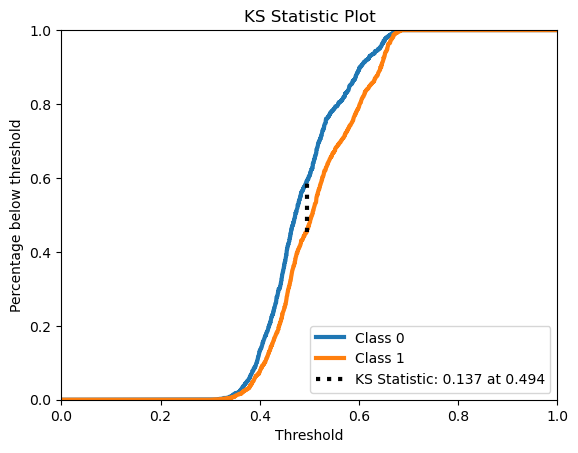

In [98]:
# Plot KS Statistic
skplt.metrics.plot_ks_statistic(y_train,
                                y_train_pred_proba)

##### Predict Again on Test data

In [99]:
# Define X_test with best predictors
X_test_best = X_test[:, best_predictors]
X_test_best = pd.DataFrame(X_test_best)
X_test_best = X_test_best.fillna(0)

# Predict class labels for sample in X_test.
y_test_pred = best_model.predict(X_test_best)

In [100]:
# Calculate the recall score on the test set
recall_test = recall_score(y_true = y_test,
                           y_pred = y_test_pred)

recall_test

0.512241054613936

In [101]:
# Predict the probability estimates
y_test_pred_proba = best_model.predict_proba(X_test_best)[:,[1]]

<Axes: ylabel='Count'>

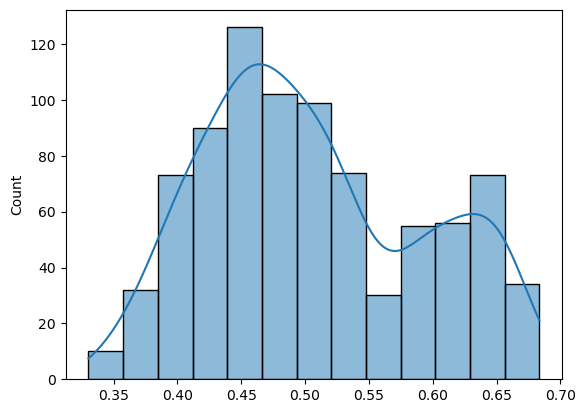

In [102]:
# Distribution plot of predicted probability
sns.histplot(x = np.reshape(y_test_pred_proba,
                            y_test.shape[0]),
             kde = True)

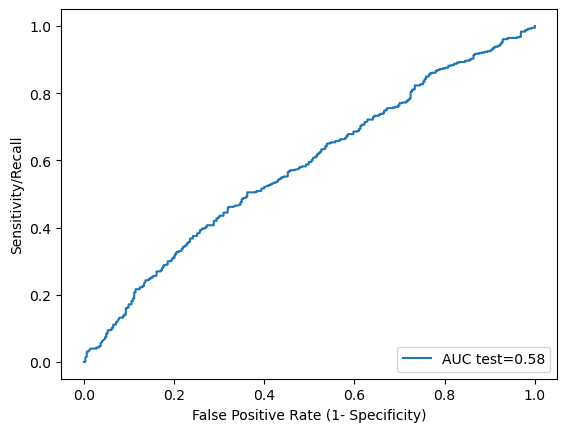

In [103]:
# Predict probability of default on X_test
y_test_pred_proba = best_model.predict_proba(X_test_best)

# Calculate sensitivity (TPR) and 1-specificity (FPR) from each possible threshold
fpr_, tpr_, threshold_ = metrics.roc_curve(y_true = y_test,
                                           y_score = y_test_pred_proba[:,1])

# Calculate AUC score using method sklearn.metrics.roc_auc_score
auc_test = metrics.roc_auc_score(y_true = y_test,
                                 y_score = y_test_pred_proba[:,1])
auc_test = round(auc_test, 2)

# Plot ROC and its AUC
plt.plot(fpr_,
         tpr_,
         label = "AUC test="+str(auc_test))

plt.ylabel("Sensitivity/Recall")
plt.xlabel("False Positive Rate (1- Specificity)")
plt.legend(loc = 4)
plt.show()

<Axes: title={'center': 'KS Statistic Plot'}, xlabel='Threshold', ylabel='Percentage below threshold'>

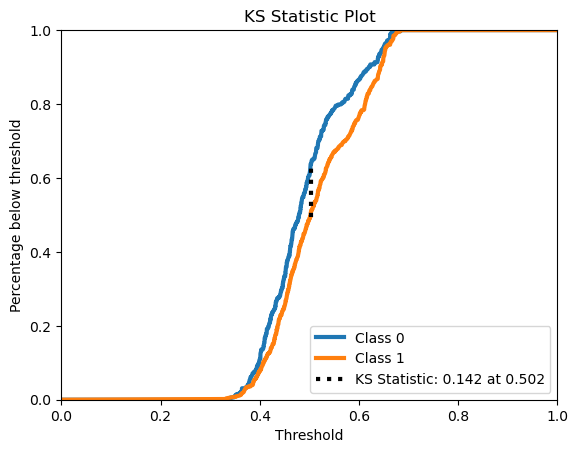

In [104]:
# Plot KS Statistic
skplt.metrics.plot_ks_statistic(y_test,
                                y_test_pred_proba)

- Sensivity/recall score dari  adjusted model atau final model sedikit menurun yaitu  is 0,52 on the train set and 0.51 on the test set.
- The AUC dari adjusted model sedikit lebih tinggi ; 0.59 pada train set dan 0.58 pada the test set.
- KS Statistik plot baik dari data train maupun data test memiliki karakteristik yang sama yaitu selilsihnya tidak cukup signifikan sehingga perbedaan data sulit diidentifikasi.

## VIII. Scorecard Development

### 1. Create Scorecards

In [105]:
# Define Factor and Offset
factor = 20/np.log(2)
offset = 300-(factor*np.log(30))

print(f"Offset = {offset:.2f}")
print(f"Factor = {factor:.2f}")

Offset = 201.86
Factor = 28.85


In [106]:
# Define n = number of characteristics
n = len(best_predictors)

# Define b0
b0 = best_model.intercept_[0]

print(f"n = {n}")
print(f"b0 = {b0:.4f}")

n = 10
b0 = -0.0001


In [107]:
# Adjust characteristic name in best_model_summary_table
for col in best_model_summary['Characteristic']:
  if col in num_columns:
    bin_col = col + '_bin'
  else:
    bin_col = col
  best_model_summary.replace(col, bin_col, inplace = True)


# Merge tables to get beta_i for each characteristic
scorecards = pd.merge(left = WOE_table,
                      right = best_model_summary,
                      how = 'left',
                      on = ['Characteristic'])

scorecards.head()

,Characteristic,Attribute,WOE,Estimate
0,income_annum_bin,"(199999.999, 2700000.0]",-0.118668,0.454696
1,income_annum_bin,"(2700000.0, 5100000.0]",0.084854,0.454696
2,income_annum_bin,"(5100000.0, 7400000.0]",0.007535,0.454696
3,income_annum_bin,"(7400000.0, 9900000.0]",0.028359,0.454696
4,loan_amount_bin,"(299999.999, 7800000.0]",-0.043268,-0.900625


In [108]:
# Define beta and WOE
beta = scorecards['Estimate']
WOE = scorecards['WOE']

# Calculate the score point for each attribute
scorecards['Points'] = (offset/n) - factor*((b0/n) + (beta*WOE))
scorecards['Points'] = scorecards['Points'].astype('int')

scorecards

,Characteristic,Attribute,WOE,Estimate,Points
0,income_annum_bin,"(199999.999, 2700000.0]",-0.118668,0.454696,21
1,income_annum_bin,"(2700000.0, 5100000.0]",0.084854,0.454696,19
2,income_annum_bin,"(5100000.0, 7400000.0]",0.007535,0.454696,20
3,income_annum_bin,"(7400000.0, 9900000.0]",0.028359,0.454696,19
4,loan_amount_bin,"(299999.999, 7800000.0]",-0.043268,-0.900625,19
5,loan_amount_bin,"(7800000.0, 14600000.0]",0.056442,-0.900625,21
6,loan_amount_bin,"(14600000.0, 21300000.0]",0.137854,-0.900625,23
7,loan_amount_bin,"(21300000.0, 38800000.0]",-0.155484,-0.900625,16
8,loan_term_bin,"(1.999, 6.0]",-0.423007,-1.036899,7
9,loan_term_bin,"(6.0, 10.0]",0.321754,-1.036899,29


In [109]:
# Calculate the min and max points for each characteristic
grouped_char = scorecards.groupby('Characteristic')
grouped_points = grouped_char['Points'].agg(['min', 'max'])
grouped_points

,min,max
Characteristic,,
bank_asset_value_bin,19,21
commercial_assets_value_bin,18,22
education,19,20
income_annum_bin,19,21
loan_amount_bin,16,23
loan_term_bin,7,29
luxury_assets_value_bin,16,22
no_of_dependents,17,25
residential_assets_value_bin,19,20


In [110]:
# Calculate the min and max score from the scorecards
total_points = grouped_points.sum()
min_score = total_points['min']
max_score = total_points['max']

print(f"The lowest credit score = {min_score}")
print(f"The highest credit score = {max_score}")

The lowest credit score = 169
The highest credit score = 223


### 2. Predict Credit Score

In [111]:
# Function to generate the points map dictionary
def get_points_map_dict(scorecards):

    # Initialize the dictionary
    points_map_dict = {}
    points_map_dict['Missing'] = {}
    unique_char = set(scorecards['Characteristic'])
    for char in unique_char:
        # Get the Attribute & WOE info for each characteristics
        current_data = (scorecards
                            [scorecards['Characteristic']==char]     # Filter based on characteristic
                            [['Attribute', 'Points']])               # Then select the attribute & WOE

        # Get the mapping
        points_map_dict[char] = {}
        for idx in current_data.index:
            attribute = current_data.loc[idx, 'Attribute']
            points = current_data.loc[idx, 'Points']

            if attribute == 'Missing':
                points_map_dict['Missing'][char] = points
            else:
                points_map_dict[char][attribute] = points
                points_map_dict['Missing'][char] = np.nan

    return points_map_dict

In [112]:
# Generate the points map dict
points_map_dict = get_points_map_dict(scorecards = scorecards)
points_map_dict

{'Missing': {'luxury_assets_value_bin': nan,
  'commercial_assets_value_bin': nan,
  'loan_amount_bin': nan,
  'bank_asset_value_bin': nan,
  'loan_term_bin': nan,
  'residential_assets_value_bin': nan,
  'self_employed': nan,
  'no_of_dependents': nan,
  'education': nan,
  'income_annum_bin': nan},
 'luxury_assets_value_bin': {Interval(299999.999, 7500000.0, closed='right'): 16,
  Interval(7500000.0, 14600000.0, closed='right'): 22,
  Interval(14600000.0, 21600000.0, closed='right'): 20,
  Interval(21600000.0, 39200000.0, closed='right'): 21},
 'commercial_assets_value_bin': {Interval(-0.001, 1300000.0, closed='right'): 20,
  Interval(1300000.0, 3700000.0, closed='right'): 18,
  Interval(3700000.0, 7600000.0, closed='right'): 22,
  Interval(7600000.0, 19400000.0, closed='right'): 18},
 'loan_amount_bin': {Interval(299999.999, 7800000.0, closed='right'): 19,
  Interval(7800000.0, 14600000.0, closed='right'): 21,
  Interval(14600000.0, 21300000.0, closed='right'): 23,
  Interval(213000

In [113]:
input = {
    'bank_asset_value_bin': 9000000,
    'commercial_assets_value_bin': 18000000,
    'education': 'Graduate',
    'loan_amount_bin': 25000000,
    'loan_term_bin': 20,
    'luxury_assets_value_bin': 7000000,
    'no_of_dependents': 2,
    'residential_assets_value_bin': 7500000,
    'self_employed': 'No',
}

In [114]:
def transform_points(raw_data, points_map_dict, num_cols):

    points_data = raw_data.copy()

    # Map the data
    for col in points_data.columns:
        if col in num_cols:
            map_col = col + '_bin'
        else:
            map_col = col

        points_data[col] = points_data[col].map(points_map_dict[map_col])

    # Map the data if there is a missing value or out of range value
    for col in points_data.columns:
        if col in num_cols:
            map_col = col + '_bin'
        else:
            map_col = col

        points_data[col] = points_data[col].fillna(value=points_map_dict['Missing'][map_col])

    return points_data

In [115]:
input_table = pd.DataFrame(input, index=[0])
input_points = transform_points(raw_data = input_table,
                                points_map_dict = points_map_dict,
                                num_cols = num_columns)

input_points

,bank_asset_value_bin,commercial_assets_value_bin,education,loan_amount_bin,loan_term_bin,luxury_assets_value_bin,no_of_dependents,residential_assets_value_bin,self_employed
0,19,18,19,16,24,16,20,20,20


In [116]:
# Function to predict the credit score
def predict_score(raw_data, cutoff_score):

    # Transform raw input values into score points
    points = transform_points(raw_data = raw_data,
                              points_map_dict = points_map_dict,
                              num_cols = num_columns)

    # Caculate the score as the total points
    score = int(points.sum(axis=1))

    print(f"Credit Score : ", score)

    if score > cutoff_score:
        print("Recommendation : APPROVE")
    else:
        print("Recommendation : REJECT")

    return score

In [117]:
input_score = predict_score(raw_data = input_table,
                            cutoff_score = 200)

Credit Score :  172
Recommendation : REJECT


### 2. Predict Credit Score on Data Train

In [118]:
# Transform the raw values in X_train into points
train_points = transform_points(raw_data = raw_train,
                                points_map_dict = points_map_dict,
                                num_cols = num_columns)

train_points.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
1877,20,19,20,19,21,7,20,20,22,20
1729,17,19,19,20,23,24,20,18,20,20
164,20,19,19,19,16,24,20,18,21,19
2298,20,20,19,19,21,7,20,22,20,21
2461,25,19,20,20,16,29,20,18,20,19


In [119]:
# Calculate the total score
train_points['Score'] = train_points.sum(axis=1).astype(int)

train_points[['no_of_dependents', 'Score']].head()

,no_of_dependents,Score
1877,20,188
1729,17,200
164,20,195
2298,20,189
2461,25,206


<Axes: xlabel='Score', ylabel='Count'>

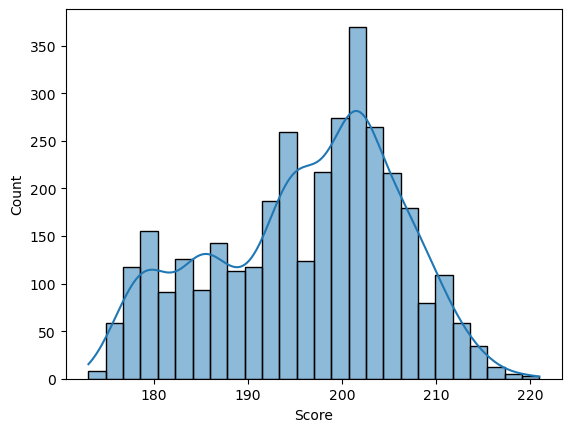

In [120]:
# Distribution plot of predicted score
sns.histplot(x = train_points['Score'],
             kde = True)

### 3. Predict Credit Score on Data Test

In [121]:
# Transform the raw values in X_train into points
test_points = transform_points(raw_data = raw_test,
                               points_map_dict = points_map_dict,
                               num_cols = num_columns)

test_points.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
2856,17,20,19,19,16.0,7,19,18,20,21
3176,20,20,19,19,21.0,24,19,22,22,20
477,20,19,20,19,16.0,23,20,18,21,21
4023,17,20,20,19,21.0,7,20,20,22,20
134,17,20,20,21,19.0,23,19,20,16,19


In [122]:
# Calculate the total score
test_points['Score'] = test_points.sum(axis=1).astype(int)

test_points[['no_of_dependents', 'Score']].head()

,no_of_dependents,Score
2856,17,176
3176,20,206
477,20,197
4023,17,186
134,17,194


<Axes: xlabel='Score', ylabel='Count'>

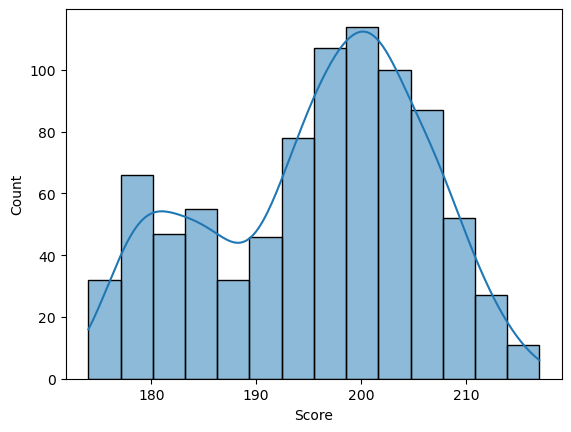

In [123]:
# Distribution plot of predicted score
sns.histplot(x = test_points['Score'],
             kde = True)

### 3. Setting Cutoff

#### Estimate Approval rate

In [124]:
cutoff_list = []
approval_rate_list = []

for cutoff in range (int(min_score), int(max_score)):

  cutoff_list.append(cutoff)

  approve_counts = len(train_points[train_points['Score'] >= cutoff])
  n_sample = len(train_points)

  approval_rate = approve_counts/n_sample

  approval_rate_list.append(approval_rate)

approval_rate_table = pd.DataFrame({'Cutoff' : cutoff_list,
                                    'Expected Approval Rate' : approval_rate_list})

approval_rate_table.head()

,Cutoff,Expected Approval Rate
0,169,1.0
1,170,1.0
2,171,1.0
3,172,1.0
4,173,1.0


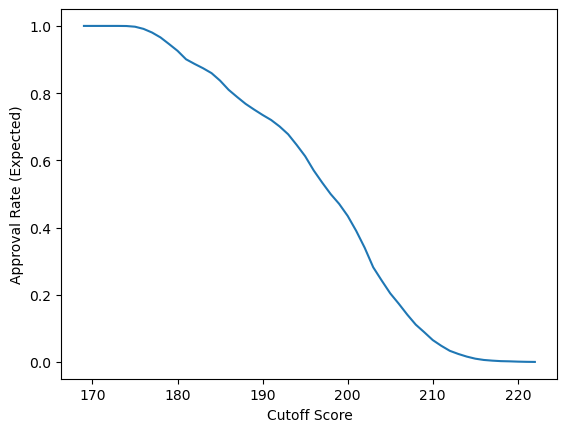

In [125]:
# Plot the approval rate
plt.plot(approval_rate_table['Cutoff'],
         approval_rate_table['Expected Approval Rate'],
         label = "Expected Approval Rate")

plt.xlabel('Cutoff Score')
plt.ylabel('Approval Rate (Expected)')
plt.show()

#### Estimate Bad rate

In [126]:
cutoff_list = []
bad_rate_list = []

for cutoff in range (int(min_score), int(max_score)):

  cutoff_list.append(cutoff)

  bad_counts = len(train_points[train_points['Score'] < cutoff])
  n_sample = len(train_points)

  bad_rate = bad_counts/n_sample

  bad_rate_list.append(bad_rate)

bad_rate_table = pd.DataFrame({'Cutoff' : cutoff_list,
                               'Expected Bad Rate' : bad_rate_list})

bad_rate_table.head()

,Cutoff,Expected Bad Rate
0,169,0.0
1,170,0.0
2,171,0.0
3,172,0.0
4,173,0.0


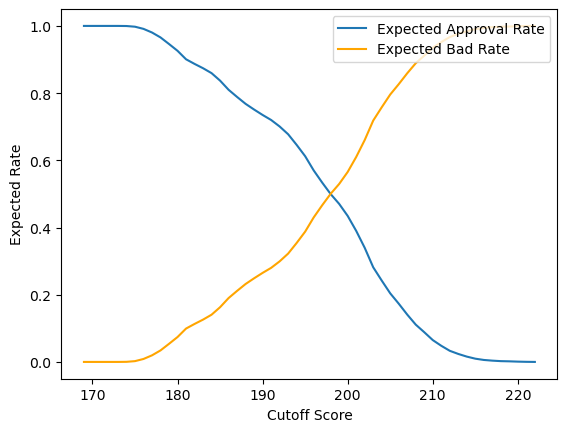

In [127]:
# Plot the approval rate
plt.plot(approval_rate_table['Cutoff'],
         approval_rate_table['Expected Approval Rate'],
         label = "Expected Approval Rate")

# Plot the expected bad rate
plt.plot(bad_rate_table['Cutoff'],
         bad_rate_table['Expected Bad Rate'],
         label = "Expected Bad Rate",
         color = 'orange')

plt.ylabel("Expected Rate")
plt.xlabel("Cutoff Score")
plt.legend(loc = 1)
plt.show()

Jika melihat pada grafik di atas, terdapat persimpangan/ titik potong. yang artinya telah terjadi perubahan dari approve menjadi rejected. Sehingga Cutoff yang optimal ada di sekitar 200.

# ありがとうございました
# 大変お疲れ様でした